# 데이콘 (Dacon) KBO OPS Forecasting Model - Hakkoma

## 1.0 Introduction

현재 컨셉은 기존의 OPS 모델을 기반으로 
현재의 생각으로는 상관계수로 빌딜을 하여 다르게 가던지 (외부 소스가 가능하다고 하니 KBO 에서 제공하는 반발계수가 사용가능하다는생각)
그렇지 않으면 기존의 모델을 test를 다수로 하여 만들예정
  
**Difference in train set and test set**  
트레인셋과 테스트 셋의 차이를 두고 비교 분석 하여 정확도 기준 수치인 (RMSE)로 비교후 더 좋은 퍼포먼스를 가진 모델 선택  
(ex. ~ 2016 년 트레인, 2017-2018 테스트 *혹은* ~2017년 트레인, 2018 테스트)  
**기본으로는 75%~80% 의 데이터를 트레인으로 기반한다**

### 개인 업데이트 로그
3월 15일  
일차적인 기본 EDA진행중 운요소 (데이콘제공)에서 막힌 상황, 운적인 요소를 배제한다는것에는 동감하지만 수식에대해서는 이해 못함
  
3월 18일  
데이콘 문의 결과, 크롤링의 경우 KBO 사이트에서만 제공되는 데이터만을 공식으로 인정.
따라서 반발계수에 대한 계획은 취소

3월 21일 EDA 분석 진행중


## 2.0 EDA

모델링 이전에 간단한 데이터 분석을 실행

In [2]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 'Dacon KBO OPS Forecasting Model - Hakkoma.ipynb',
 'input']

In [4]:
data = pd.read_csv("input/Regular_Season_Batter.csv")

In [5]:
data.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

기본적 데이터 변수들의 정보는 다음과 같다.  

|Number|Columns|Description|
|:----:|:---:|:---:|
|1|batter_id|타자의 고유 아이디|
|2|batter_name|ㅡㅡ|
|3|year|ㅡㅡ|
|4|team|ㅡㅡ|
|5|avg|mm|
|6|Glmm|
|7|AB|mm|
|8|R|mm|
|9|H|mm|
|10|2B|mm|
|11|3B|mm|
|12|HR|mm|
|13|TB|mm|
|14|RBI|mm|
|15|SB|mm|
|16|CS|mm|
|17|BB|mm|
|18|HBP|mm|
|19|SO|mm|
|20|GDP|mm|
|21|SLG|mm|
|22|OBP|mm|
|23|E|mm|
|24|height/weight|mm|
|25|year_born|mm|
|26|position|mm|
|27|career|mm|
|28|starting_salary|mm|
|29|OPS|mm|

In [60]:
#1루타 지표 생성
data['1B'] = data['H'] - data['2B'] - data['3B'] - data['HR']
data.head

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,1B
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,45
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,13
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,67
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,10


#### Year (년도)

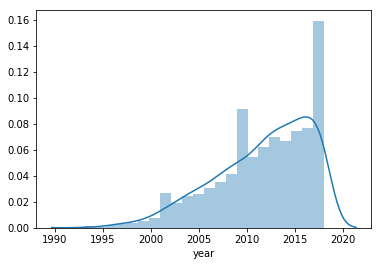

In [7]:
sns.distplot(data['year'])

데이터의 양이 최근 년도로 편중 되있는것으로 확인된다.

In [8]:
data['year'].describe()

count    2454.000000
mean     2011.614507
std         4.992833
min      1993.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

기본적인 데이터 분석에서도 중간값이 **2011년대**로 나오는것을 확인 할수 있다. 

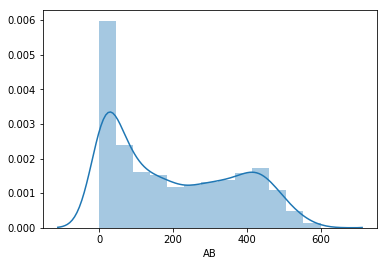

In [9]:
sns.distplot(data['AB'])

상당수의 타자들이 **100 회 이하의 타석**에 들어선것을 알수 있다.

In [10]:
data['AB'].describe()

count    2454.000000
mean      201.514670
std       169.537029
min         0.000000
25%        38.250000
50%       163.000000
75%       357.500000
max       600.000000
Name: AB, dtype: float64

기본적 데이터 분석에서도 **절반의 선수가 163 타석이하로 들어서는 것**을 알 수 있다.

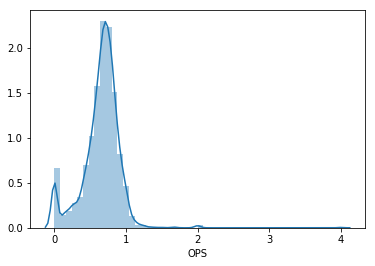

In [11]:
sns.distplot(data['OPS'].dropna())

**OPS**의 경우 어느정도 정규분포를 따른다고 이야기 할 수 있다.

In [12]:
data['OPS'].describe()

count    2428.000000
mean        0.649939
std         0.261634
min         0.000000
25%         0.546000
50%         0.688637
75%         0.797234
max         4.000000
Name: OPS, dtype: float64

Text(0.5,1,'OPS on AB')

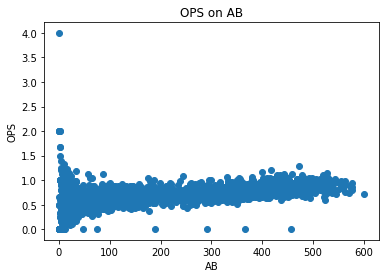

In [13]:
plt.scatter(data['AB'],data['OPS'])
plt.xlabel("AB")
plt.ylabel("OPS")
plt.title("OPS on AB")

**OPS**는 **AB(타석)** 수에 **비례하여 상승** 하는것으로 보인다  
이와 같은 경우는 **성적이 좋은선수 (OPS가 높을 가능성이 높음)** 가  
꾸준히 타석에 들어서기 때문일 가능성이 제기된다.

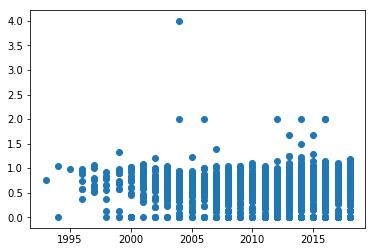

In [14]:
plt.scatter(data['year'],data['OPS'])

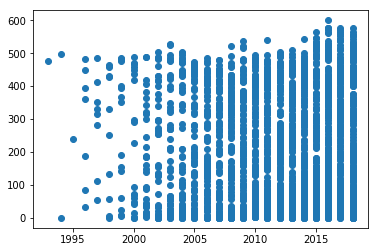

In [15]:
plt.scatter(data['year'],data['AB'])

In [16]:
data.nunique()

batter_id           345
batter_name         345
year                 26
team                 16
avg                 280
G                   144
AB                  531
R                   122
H                   193
2B                   46
3B                   15
HR                   47
TB                  304
RBI                 132
SB                   61
CS                   22
BB                   97
HBP                  26
SO                  142
GDP                  24
SLG                 992
OBP                 851
E                    28
height/weight       182
year_born           336
position             10
career              343
starting_salary      30
OPS                1380
dtype: int64

In [17]:
data['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [18]:
data.groupby(['position'])['OPS'].mean()
#그룹별로 해서 그래프로 도출하기

position
내야수(우투양타)    0.275000
내야수(우투우타)    0.674866
내야수(우투좌타)    0.642086
내야수(좌투좌타)    0.748972
외야수(우투양타)    0.697714
외야수(우투우타)    0.665179
외야수(우투좌타)    0.685956
외야수(좌투좌타)    0.656005
포수(우투우타)     0.613227
포수(우투좌타)     0.592643
Name: OPS, dtype: float64

In [19]:
data.loc[data['year']>2000]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000000,0.000000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349000,0.337000,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686000
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325000,0.348000,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673000
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257000,0.232000,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489000
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,1,0.262000,0.290000,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552000
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,7,0.392000,0.382000,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774000
7,2,강구성,2013,NC,0.000,2,2,0,0,0,...,0,0.000000,0.000000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000000
8,2,강구성,2015,NC,0.200,4,5,0,1,1,...,0,0.400000,0.200000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.600000
9,2,강구성,2016,NC,0.000,2,3,0,0,0,...,0,0.000000,0.000000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000000


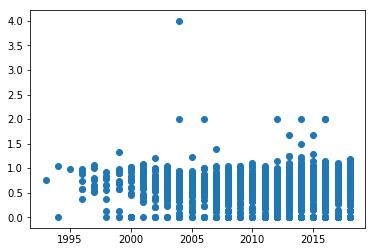

In [20]:
plt.scatter(data['year'],data['OPS'])

In [21]:
data.groupby(['team'])['OPS'].mean()

team
KIA     0.669274
KT      0.604821
LG      0.611325
NC      0.629626
OB      0.690377
SK      0.689050
넥센      0.674685
두산      0.703056
롯데      0.623394
삼성      0.649713
쌍방울     0.000000
우리      0.526328
한화      0.617033
해태      0.731766
현대      0.714416
히어로즈    0.560414
Name: OPS, dtype: float64

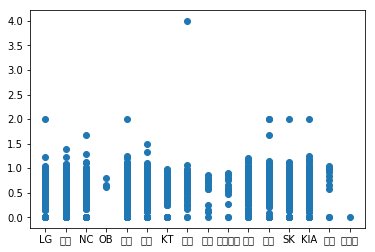

In [22]:
plt.scatter(data['team'],data['OPS'])

### Correlation (OPS)

In [25]:
data_corr = data.corr()
data.corr()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
batter_id,1.000000,-0.059060,-0.037432,-0.036249,-0.042264,-0.069169,-0.043593,-0.043471,-0.075027,-0.041416,...,-0.049258,-0.068401,-0.067060,-0.024073,-0.061203,-0.013839,-0.036928,-0.033690,-0.058620,-0.039554
year,-0.059060,1.000000,0.047164,-0.002804,-0.007138,0.030349,0.016305,0.020140,-0.018048,0.021358,...,-0.104432,-0.108576,-0.020457,0.005585,0.054268,0.004520,0.048796,0.059733,-0.080026,0.054094
avg,-0.037432,0.047164,1.000000,0.486049,0.493054,0.488481,0.521170,0.485083,0.268319,0.370007,...,0.255881,0.293852,0.448144,0.327718,0.416041,0.402419,0.868183,0.898050,0.259142,0.919696
G,-0.036249,-0.002804,0.486049,1.000000,0.931613,0.859570,0.892624,0.833705,0.488191,0.632064,...,0.489876,0.575591,0.814841,0.640272,0.862002,0.757007,0.516975,0.486954,0.577912,0.534539
AB,-0.042264,-0.007138,0.493054,0.931613,1.000000,0.946174,0.985374,0.924361,0.533750,0.728135,...,0.545551,0.617874,0.891425,0.665467,0.888006,0.807997,0.540886,0.483047,0.573509,0.546879
R,-0.069169,0.030349,0.488481,0.859570,0.946174,1.000000,0.961276,0.907399,0.571925,0.769227,...,0.610985,0.633020,0.895176,0.656564,0.836260,0.718449,0.556065,0.488408,0.508033,0.558242
H,-0.043593,0.016305,0.521170,0.892624,0.985374,0.961276,1.000000,0.939350,0.535429,0.751363,...,0.541087,0.602168,0.894687,0.649509,0.848227,0.796256,0.566842,0.503413,0.535391,0.571506
2B,-0.043471,0.020140,0.485083,0.833705,0.924361,0.907399,0.939350,1.000000,0.468033,0.746644,...,0.453971,0.519506,0.839813,0.619308,0.817390,0.755878,0.566631,0.470049,0.519853,0.556933
3B,-0.075027,-0.018048,0.268319,0.488191,0.533750,0.571925,0.535429,0.468033,1.000000,0.205052,...,0.608751,0.588569,0.436684,0.290162,0.446949,0.263779,0.261314,0.244860,0.291324,0.269084
HR,-0.041416,0.021358,0.370007,0.632064,0.728135,0.769227,0.751363,0.746644,0.205052,1.000000,...,0.208335,0.263538,0.749476,0.597497,0.747049,0.649441,0.575835,0.385169,0.382102,0.525660


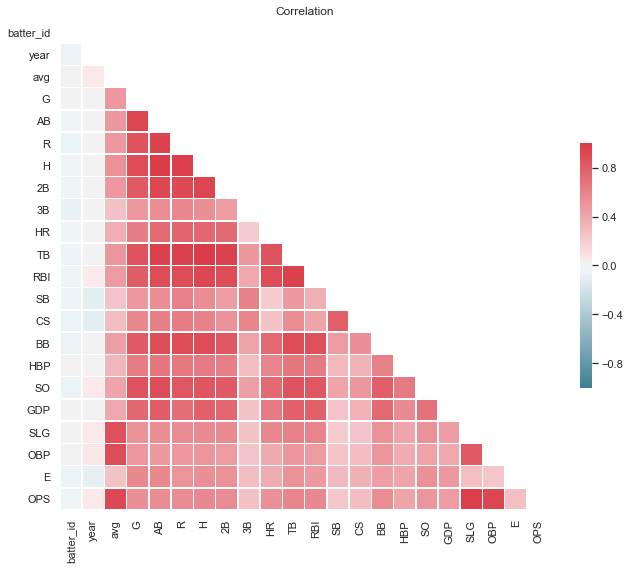

In [44]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr,mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation')
plt.show()

Correlation 으로 알아보면  
  
**신뢰성이 높은 변수 측면**  
**G, AB, R, H, HR, TB, SB, SLG** 가 **선뢰성이 높은** 것으로 관찰된다.
  
**신뢰성이 낮은 변수 측면**
**3B, RBI, OBP, E** 가 **신뢰성이 낮은** 것으로 관찰된다.
  
**OPS 측면**  
**avg, SLG, OBP** 가 **OPS와 높은 상관관계**를 가지는것을 알수있다.

**결론**
신뢰성이 낮은 변수들은 **운적인 요소가 강한** 것으로 보이며,  
신뢰성이 높은 변수들은 **선수 개인의 능력** 과 관련깊게 보인다.  
이과 같이 신뢰성이 높은 변수가 **OPS** 에 크게 연관되어 있다.

## Data cleaning

필요성이 적은 데이들을 제거

In [56]:
data.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [61]:
data_use = data.loc[:,['batter_id','batter_name','year','team','avg',
                'G', 'AB', 'R', 'H','1B','2B', '3B', 'HR', 'TB', 'RBI','SB', 
                'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E','OPS']]

In [62]:
data_use

,batter_id,batter_name,year,team,avg,G,AB,R,H,1B,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,45,...,5,0,9,8,25,3,0.519000,0.383000,9,0.902000
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0,0,0,1,0,0.000000,0.000000,1,0.000000
2,1,강경학,2014,한화,0.221,41,86,11,19,13,...,0,0,13,2,28,1,0.349000,0.337000,6,0.686000
3,1,강경학,2015,한화,0.257,120,311,50,80,67,...,4,3,40,5,58,3,0.325000,0.348000,15,0.673000
4,1,강경학,2016,한화,0.158,46,101,16,16,10,...,0,0,8,2,30,5,0.257000,0.232000,7,0.489000
5,1,강경학,2017,한화,0.214,59,84,17,18,15,...,1,1,8,1,19,1,0.262000,0.290000,4,0.552000
6,1,강경학,2018,한화,0.278,77,245,42,68,51,...,6,3,38,4,59,7,0.392000,0.382000,2,0.774000
7,2,강구성,2013,NC,0.000,2,2,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0,0.000000
8,2,강구성,2015,NC,0.200,4,5,0,1,0,...,0,0,0,0,0,0,0.400000,0.200000,0,0.600000
9,2,강구성,2016,NC,0.000,2,3,0,0,0,...,0,0,0,0,1,0,0.000000,0.000000,0,0.000000
